In [423]:
import itertools
import random
import matplotlib.pyplot as plt
import numpy as np

class Schelling:
    
    
    def __init__(self, width, height, empty_ratio, similarity_threshold, n_iterations, races):
        self.width=width
        self.height=height
        self.empty_ratio=empty_ratio
        self.similarity_threshold=similarity_threshold
        self.n_iterations=n_iterations
        self.races=races
        
    def populate(self):
        self.empty_houses=[]
        self.agents={}
        self.a=list(range(1,self.width+1))
        self.b=list(range(1,self.height+1))
        self.all_houses=list(itertools.product(self.a,self.b))                     
        random.shuffle(self.all_houses)
        self.n_empty=round(self.empty_ratio*len(self.all_houses))
        self.remaining_houses=self.all_houses[:len(self.all_houses)-self.n_empty]
        self.race_list=list(range(1,self.races+1))
        for i in range(len(self.remaining_houses)):   
            random.shuffle(self.race_list)
            self.chosen_one=self.race_list[0]
            self.agents[self.remaining_houses[i]]=self.chosen_one
        return self.agents
    
    def plot_city(self):
        fig, ax = plt.subplots(figsize=(self.width*0.5, self.height*0.5))
        ax.set_xlim([0, self.width])
        ax.set_ylim([0, self.height])
        ax.set_xticks(np.arange(0, self.width, 1))
        ax.set_yticks(np.arange(0, self.height, 1))
        ax.xaxis.set_ticklabels([])
        ax.xaxis.set_ticks_position('none')
        ax.yaxis.set_ticklabels([])
        ax.yaxis.set_ticks_position('none')
        ax.grid()
        cols = ['r', 'g', 'b', 'c', 'm', 'y', 'k']           
        for key, value in self.agents.items():           
            x = key[0]-0.5
            y = key[1]-0.5
            ax.scatter(x, y, c=cols[value-1], marker='s', s=500)
        
    def is_unsatisfied(self, coordinate_x, coordinate_y):
        self.coordinate_x=coordinate_x
        self.coordinate_y=coordinate_y
        self.x2=self.coordinate_x+1
        self.x1=self.coordinate_x-1
        self.y2=self.coordinate_y+1
        self.y1=self.coordinate_y-1
        self.neighbours=[(self.x1,self.y1),(self.x2,self.y2),(self.x1,self.y2),(self.x2,self.y1),
        (self.coordinate_x,self.y1),(self.coordinate_x,self.y2),(self.x1,self.coordinate_y),(self.x2,self.coordinate_y)]
        self.count=0
        if (self.coordinate_x,self.coordinate_y) not in self.agents.keys():
            return 'Empty'
        for i in self.neighbours:
            if i in self.agents.keys():
                if self.agents[i]==self.agents[(self.coordinate_x,self.coordinate_y)]:
                    self.count+=1
        self.tot_neighbours=0
        for i in self.neighbours:
            if i in self.agents.keys():
                self.tot_neighbours+=1
        if self.count/self.tot_neighbours < self.similarity_threshold:
            return True
        else:
            return False
        
    def update(self):
        self.empty_houses=self.all_houses[len(self.all_houses)-self.n_empty:]
        self.key_list=list(self.agents.keys())
        self.value_list=list(self.agents.values())
        if len(self.empty_houses)==0:
            return self.agents
        for i in range(len(self.agents)):
            self.x=list(self.agents.keys())[i][0]
            self.y=list(self.agents.keys())[i][1]
            if self.is_unsatisfied(self.x,self.y):
                random.shuffle(self.empty_houses)
                self.new_house=self.empty_houses.pop(0)
                self.empty_houses.append(self.key_list[i])
                self.key_list[i]=self.new_house
        self.agents={}
        for key in self.key_list:
            for value in self.value_list:
                self.agents[key] = value
                self.value_list.remove(value)
                break
        return self.agents
    
    def sim_index(self, coordinate_x, coordinate_y):
        self.coordinate_x=coordinate_x
        self.coordinate_y=coordinate_y
        self.x2=self.coordinate_x+1
        self.x1=self.coordinate_x-1
        self.y2=self.coordinate_y+1
        self.y1=self.coordinate_y-1
        self.neighbours=[(self.x1,self.y1),(self.x2,self.y2),(self.x1,self.y2),(self.x2,self.y1),
        (self.coordinate_x,self.y1),(self.coordinate_x,self.y2),(self.x1,self.coordinate_y),(self.x2,self.coordinate_y)]
        self.count=0
        for i in self.neighbours:
            if i in self.agents.keys():
                if self.agents[i]==self.agents[(self.coordinate_x,self.coordinate_y)]:
                    self.count+=1
        self.tot_neighbours=0
        for i in self.neighbours:
            if i in self.agents.keys():
                self.tot_neighbours+=1
        return self.count/self.tot_neighbours

# we were supposed to calculate the ratio between neighbours of the same race to neighbours of a different race but if
# there are no neighbours of a different race, we end up dividing by zero, therefore I will just divide by total neighbours
        
    def sim_ratio(self):
        self.ratios=[]
        for i in range(len(self.agents)):
            self.x=list(self.agents.keys())[i][0]
            self.y=list(self.agents.keys())[i][1]
            data_transfer=self.sim_index(self.x,self.y)
            if self.tot_neighbours > 0: # remove any houses with no neighbours to avoid dividing by zero
                self.ratios.append(self.sim_index(self.x,self.y))
        self.avg_ratio=sum(self.ratios)/len(self.ratios)
        return self.avg_ratio


                
                

In [424]:
trial=Schelling(3,3,0.2,0.4,44,2)
print(trial.populate())

{(3, 3): 1, (2, 2): 1, (3, 1): 2, (1, 3): 1, (1, 1): 1, (3, 2): 2, (1, 2): 1}


None


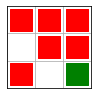

In [407]:
print(trial.plot_city())

In [391]:
trial.is_unsatisfied(1,3)

'Empty'

In [387]:
trial.update()

{(1, 2): 2, (2, 1): 2, (1, 3): 2, (3, 2): 1, (3, 3): 1, (3, 1): 1, (1, 1): 2}

In [403]:
trial.sim_index(2,1)

0.75

In [425]:
trial.sim_ratio()

0.7142857142857143

In [ ]:
import itertools
    itertools.product(list1,list2)
    import random
    random.shuffle(list)

In [114]:
import random

d = [1, 2, 3, 4, 5, 6, 7]
random.shuffle(d)

print(d)

[3, 6, 1, 2, 7, 5, 4]


In [261]:
dict={(1,2):3,(1,3):4}
dict.keys()[0]

TypeError: 'dict_keys' object is not subscriptable

In [85]:
3==3 and 4==4

True

In [ ]:
        # add the conditioning for situations where there are not 8 neighbours only here when defining self.neighbours
        # you may need to condition for differences between the four borders
        if self.coordinate_x==1 and self.coordinate_y==1 or (self.coordinate_x==self.width and self.coordinate_y==self.height):
            self.neighbours=[(1,2),(2,1),(2,2)]

            
        if self.coordinate_x==1 and self.coordinate_y==1:
            self.neighbours=[()]
        elif self.coordinate_x==1 and self.coordinate_y==self.height:
            self.neighbours=[()]
        elif self.coordinate_x==self.width and self.coordinate_y==1:
            self.neighbours=[()]
        elif self.coordinate_x==self.width and self.coordinate_y==self.height:
            self.neighbours=[()]
        elif self.coordiante_x==1 and 1 < self.coordinate_y < self.height:
            self.neighbours=[()]
        elif self.coordinate_x==self.width and 1 < self.coordinate_y < self.height:
            self.neighbours=[()]
        elif 1 < self.coordinate_x < 

In [88]:
False ^ False

False

In [260]:
listx=[1,2,3]
y=listx.pop(1)
y
listx

[1, 3]

In [419]:
sum([1,4,5])

10